In [1]:
from tensorflow import keras

In [2]:
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
x_train = x_train / 255
x_test = x_test / 255

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(30, activation="relu"),
])

In [5]:
decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

Now stack them for training:


In [6]:
stacked_autoencoder = keras.models.Sequential([encoder, decoder])

In [7]:
stacked_autoencoder.compile(loss="binary_crossentropy",
                   optimizer='adam')

In [8]:
history = stacked_autoencoder.fit(x_train, x_train, epochs=10,
                                  validation_data=[x_test, x_test])

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1466 - val_loss: 0.1089
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1049 - val_loss: 0.0996
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0995 - val_loss: 0.0970
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0967 - val_loss: 0.0945
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0948 - val_loss: 0.0927
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0936 - val_loss: 0.0923
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0926 - val_loss: 0.0911
Epoch 8/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0919 - val_loss: 0.0907
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0912 - val_loss: 0.0902
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

In [10]:
%pylab

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


In [11]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


1/1 [==============================] - 0s 25ms/step


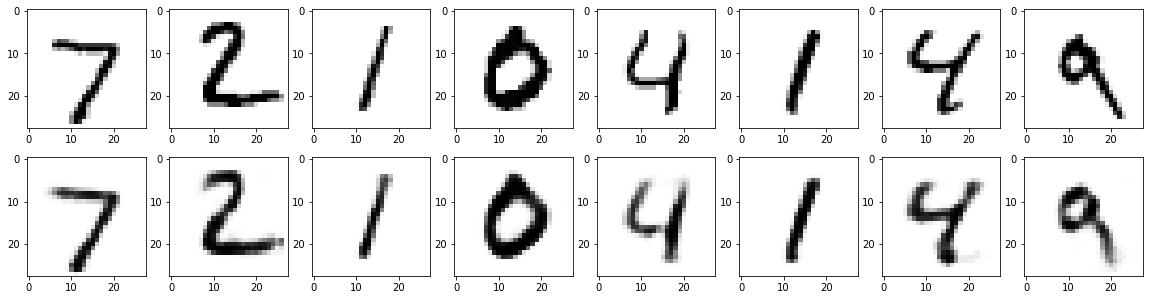

In [12]:
figsize(20, 5)
for i in range(8):
  subplot(2, 8, i+1)
  pred = stacked_autoencoder.predict(x_test[i].reshape((1, 28, 28)))
  imshow(x_test[i], cmap="binary")

  subplot(2, 8, i+8+1)
  imshow(pred.reshape((28, 28)), cmap="binary")

1/1 [==============================] - 0s 52ms/step


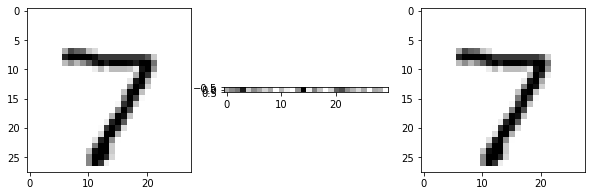

In [13]:
i = 0 # change this number

figsize(10, 5)
subplot(1, 3, 1)
imshow(x_test[i], cmap="binary")
subplot(1, 3, 2)
latent_vector = encoder.predict(x_test[i].reshape((1, 28, 28)))
imshow(latent_vector, cmap="binary")
subplot(1, 3, 3)
pred = decoder.predict(latent_vector)
imshow(x_test[i], cmap="binary")



In [14]:
#Finding compression
30 / (28 * 28), 1 - 30 / (28 * 28)

(0.03826530612244898, 0.9617346938775511)

Compression of 96%